In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sqlite3

In [2]:
pd.set_option('display.max_rows', 500, 'display.max_columns', 500)

# Store Analysis

In [3]:
# Connect SQLite.
con = sqlite3.connect('IowaLiquor.db')
cur = con.cursor()

In [4]:
# Pull Store database.
query = '''SELECT * FROM Store;'''
cur.execute(query)
result = cur.fetchall()
cur.close()
con.close()

In [5]:
# Put the database in a data frame format.
store = pd.DataFrame(result, columns = ['StoreID',
                                            'StoreName',
                                            'City',
                                            'ZipCode',
                                            'CountyNumber',
                                            'County',
                                            'Long',
                                            'Lat'])

In [6]:
store.head()

,StoreID,StoreName,City,ZipCode,CountyNumber,County,Long,Lat
0,2663,Hy-vee Food Store,Urbandale,50322,77.0,Polk,-93.74,41.63
1,2647,Hy-vee 7,Cedar Rapids,52411,57.0,Linn,-91.70,42.03
2,5259,Gameday Liquor,Glenwood,51534,65.0,Mills,-95.92,41.28
3,5597,Liquor Tobacco & Gas,Dubuque,52001,31.0,Dubuque,-90.67,42.51
4,3749,Wal-mart 1526,Storm Lake,50588,11.0,Buena Vist,-95.20,42.66


In [7]:
store.shape

(2454, 8)

In [8]:
# Create HyVee specific data.
store_HyVee = store.copy()

In [9]:
store_HyVee['HyVee_control'] = np.where(store_HyVee['StoreName'].str.contains('Hy-vee'),1,0)
store_HyVee = store_HyVee.loc[store_HyVee['HyVee_control'] == 1].reset_index()

In [10]:
store_HyVee.drop(columns = ['index', 'HyVee_control'], inplace = True)

In [11]:
store_HyVee

,StoreID,StoreName,City,ZipCode,CountyNumber,County,Long,Lat
0,2663,Hy-vee Food Store,Urbandale,50322,77.0,Polk,-93.74,41.63
1,2647,Hy-vee 7,Cedar Rapids,52411,57.0,Linn,-91.70,42.03
2,2565,Hy-vee Food Store 1636,Spencer,51301,21.0,Clay,-95.15,43.15
3,2662,Hy-vee Wine & Spirits,Muscatine,52761,70.0,Muscatine,-91.04,41.43
4,2555,Hy-vee Food Store,Keokuk,52632,56.0,Lee,-91.40,40.42
5,2571,Hy-vee Food Store 2,Waterloo,50703,7.0,Black Hawk,-92.34,42.53
6,2578,Hy-vee,Charles City,50616,34.0,Floyd,-92.68,43.07
7,2675,Hy-vee 2,Coralville,52241,52.0,Johnson,-91.61,41.72
8,2635,Hy-vee 4,Davenport,52807,82.0,Scott,-90.51,41.57
9,2718,Hy-vee Waukon Dollar Fresh,Waukon,52172,3.0,Allamakee,-91.49,43.26


In [12]:
# Pull county population data
County_Pop = pd.read_csv('Data/Iowa_County_Population.csv')
County_Pop['Population'] = County_Pop['Population'].str.replace(',','').astype(int)

In [13]:
County_Merge = store_HyVee.merge(County_Pop[['County', 'Population']], on = 'County', how = 'left')

In [14]:
County_Merge.loc[County_Merge['Population'].isnull()]

,StoreID,StoreName,City,ZipCode,CountyNumber,County,Long,Lat,Population
11,2613,Hy-vee Food Store 1,Council Bluffs,51501,78.0,Pottawatta,-95.88,41.26,NaN
23,2629,Hy-vee Food Store 2,Council Bluffs,51503,78.0,Pottawatta,-95.83,41.24,NaN
39,2652,Hy-vee Drugstore,Mason City,50401,17.0,Cerro Gord,-93.21,43.15,NaN
51,2576,Hy-vee Wine & Spirits,Storm Lake,50588,11.0,Buena Vist,-95.20,42.65,NaN
52,2582,Hy-vee 2 Food Store,Mason City,50401,17.0,Cerro Gord,-93.17,43.15,NaN
56,2661,Hy-vee Food Store,Sheldon,51201,71.0,Obrien,-95.83,43.19,NaN
62,2641,Hy-vee Drugstore,Council Bluffs,51501,78.0,Pottawatta,-95.86,41.26,NaN
89,2515,Hy-vee Food Store 1,Mason City,50401,17.0,Cerro Gord,-93.24,43.15,NaN
152,2701,Hy-vee Fast & Fresh,Storm Lake,50588,11.0,Buena Vist,-95.20,42.65,NaN


In [15]:
store_HyVee.loc[store_HyVee['County'] == 'Buena Vist', 'County'] = 'Buena Vista'
store_HyVee.loc[store_HyVee['County'] == 'Pottawatta', 'County'] = 'Pottawattamie'
store_HyVee.loc[store_HyVee['County'] == 'Obrien', 'County'] = "O'Brien"
store_HyVee.loc[store_HyVee['County'] == 'Cerro Gord', 'County'] = 'Cerro Gordo'

In [16]:
County_Merge = store_HyVee.merge(County_Pop[['County', 'Population']], on = 'County', how = 'left')

In [17]:
County_Merge.loc[County_Merge['Population'].isnull()]

,StoreID,StoreName,City,ZipCode,CountyNumber,County,Long,Lat,Population


In [18]:
store_HyVee = County_Merge.copy()

In [19]:
store_HyVee.head()

,StoreID,StoreName,City,ZipCode,CountyNumber,County,Long,Lat,Population
0,2663,Hy-vee Food Store,Urbandale,50322,77.0,Polk,-93.74,41.63,479612
1,2647,Hy-vee 7,Cedar Rapids,52411,57.0,Linn,-91.70,42.03,223861
2,2565,Hy-vee Food Store 1636,Spencer,51301,21.0,Clay,-95.15,43.15,16211
3,2662,Hy-vee Wine & Spirits,Muscatine,52761,70.0,Muscatine,-91.04,41.43,42889
4,2555,Hy-vee Food Store,Keokuk,52632,56.0,Lee,-91.40,40.42,34227


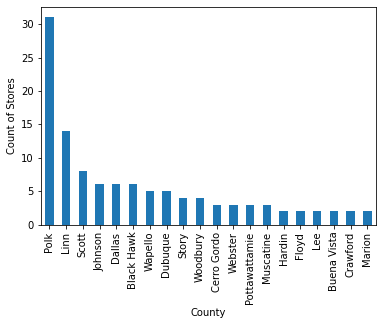

In [26]:
# Look at HyVee store distribution by county.
store_HyVee.groupby('County').agg({'StoreID':'count'}).sort_values(by = 'StoreID', ascending = False).head(20).plot.bar()
plt.ylabel("Count of Stores")
plt.legend().remove()

In [27]:
County_Pop.sort_values('Population', ascending = False)

,Rank,County,Population
0,1,Polk,479612
1,2,Linn,223861
2,3,Scott,172446
3,4,Johnson,148577
4,5,Black Hawk,132393
5,6,Woodbury,102586
6,7,Dubuque,96982
7,8,Story,96941
8,9,Pottawattamie,93393
9,10,Dallas,87099


Looks like Polk is dominating in terms of number of stores, but it is the county with largest population.

In [28]:
County_Pivot = store_HyVee.groupby(['County']).agg({'Population':'first', 'StoreName':'count'})

In [29]:
County_Pivot['Store_per_Capital'] = County_Pivot['StoreName'] / County_Pivot['Population']

<AxesSubplot:xlabel='County'>

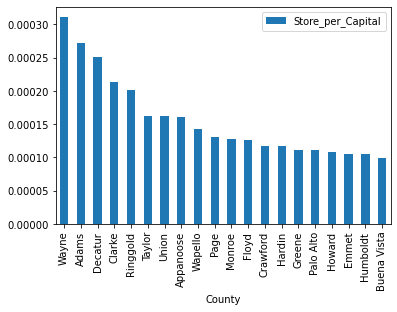

In [30]:
County_Pivot.sort_values(by = 'Store_per_Capital', ascending = False).head(20).plot.bar(y = 'Store_per_Capital')

<AxesSubplot:xlabel='StoreName', ylabel='Population'>

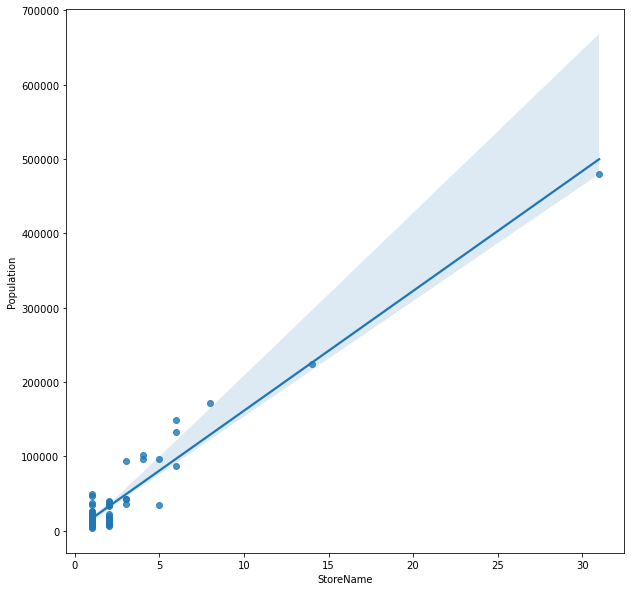

In [31]:
plt.figure(figsize = (10,10))
sns.regplot(data = County_Pivot, x = 'StoreName', y = 'Population')

In [26]:
con = sqlite3.connect('IowaLiquor.db')
cur = con.cursor()

In [27]:
query = '''
SELECT
    Store.StoreName,
    Date,
    Store.County,
    Volume,
    Sale
FROM Transactions
LEFT JOIN Store ON Transactions.StoreID = Store.StoreID
WHERE Store.StoreName LIKE '%Hy-vee%';
'''
transaction_HyVee = pd.read_sql_query(query, con)
cur.close()
con.close()

In [28]:
transaction_HyVee

,StoreName,Date,County,Volume,Sale
0,Hy-vee Food Store,2019-07-09 00:00:00,Polk,2.77,90.00
1,Hy-vee 2,2020-11-02 00:00:00,Story,2.77,53.76
2,Hy-vee 7,2020-02-03 00:00:00,Linn,3.17,141.00
3,Hy-vee Food Store 1636,2020-07-01 00:00:00,Clay,0.01,13.31
4,Hy-vee 2,2019-07-09 00:00:00,Polk,0.07,11.03
...,...,...,...,...,...
6283490,Hy-vee Food Store,2021-06-30 00:00:00,Mahaska,2.77,116.64
6283491,Hy-vee Wine & Spirits,2021-06-30 00:00:00,Kossuth,2.37,144.00
6283492,Hy-vee Food Store,2021-06-30 00:00:00,Lee,1.18,180.00
6283493,Hy-vee 7,2021-06-30 00:00:00,Linn,2.37,148.68


In [29]:
transaction_HyVee['Date'] = pd.to_datetime(transaction_HyVee['Date'])

In [30]:
transaction_HyVee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6283495 entries, 0 to 6283494
Data columns (total 5 columns):
 #   Column     Dtype         
---  ------     -----         
 0   StoreName  object        
 1   Date       datetime64[ns]
 2   County     object        
 3   Volume     float64       
 4   Sale       float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 239.7+ MB


### Check for Store Longevity

<AxesSubplot:ylabel='County'>

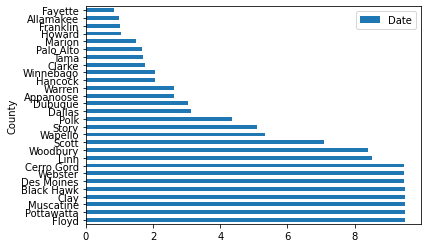

In [31]:
store_Longevity = transaction_HyVee.groupby(['StoreName']).agg({'Date': lambda x:(x.max() - x.min()).days / 365, 'County': 'first'})
store_Longevity.groupby(['County']).agg({'Date':'mean'}).sort_values(by = 'Date', ascending = False).plot.barh()

It seems like a good amount of counties didn't operate for more than 5 years.
Since the data covers from 2012/1/1 through current, 9 years makes sense for the max number of years.
It was interesting that the top 3 number of stores (Polk, Linn, and Scott) weren't there for 9 years average.
But it makes sense if they are expanding hard in those areas.

In [32]:
transaction_HyVee.loc[transaction_HyVee['Date'].dt.year == 2021]['StoreName'].nunique()

61

<AxesSubplot:xlabel='Date', ylabel='StoreName'>

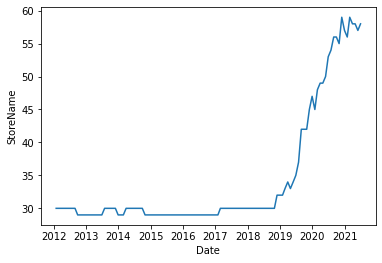

In [33]:
graph1 = transaction_HyVee.groupby([pd.Grouper(key = 'Date',freq = 'M')]).agg({'StoreName':'nunique','Volume':'sum','Sale':'sum'}).reset_index()
sns.lineplot(data = graph1, x='Date', y='StoreName')

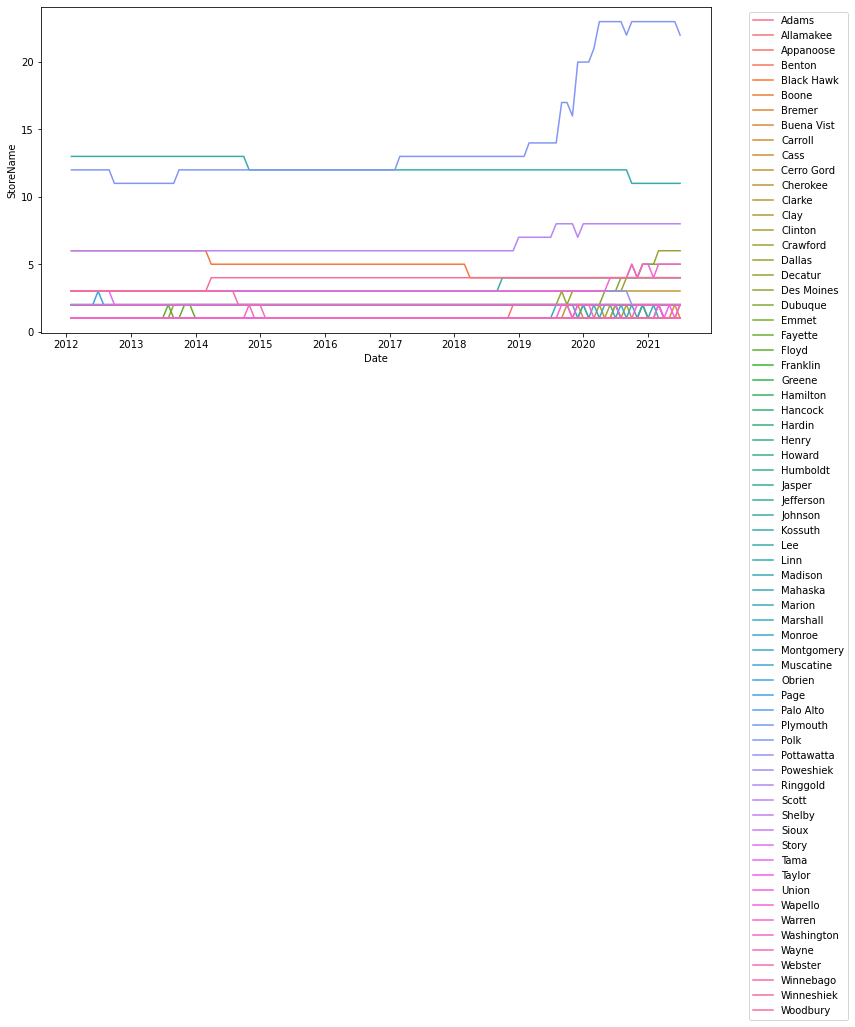

In [34]:
graph2 = transaction_HyVee.groupby(['County',pd.Grouper(key = 'Date',freq = 'M')]).agg({'StoreName':'nunique','Volume':'sum','Sale':'sum'}).reset_index()
plt.figure(figsize = (12,6))
sns.lineplot(data = graph2, x = 'Date', y = 'StoreName', hue = 'County')
plt.legend(bbox_to_anchor = (1.05, 1))

In [35]:
polk = graph2[graph2['County'] == 'Polk']

<AxesSubplot:xlabel='Date', ylabel='StoreName'>

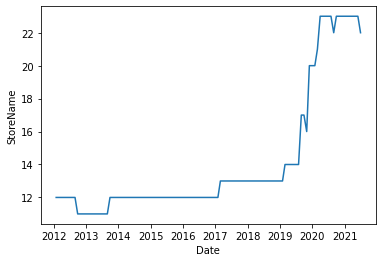

In [36]:
sns.lineplot(data = polk, x = 'Date', y = 'StoreName')

<AxesSubplot:xlabel='Date', ylabel='Volume'>

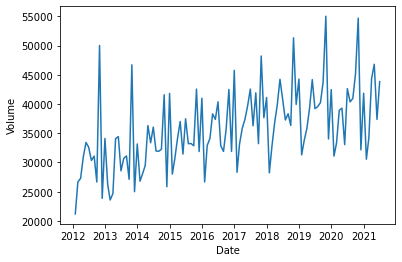

In [37]:
sns.lineplot(data = polk, x = 'Date', y = 'Volume')

<AxesSubplot:xlabel='Date', ylabel='Sale'>

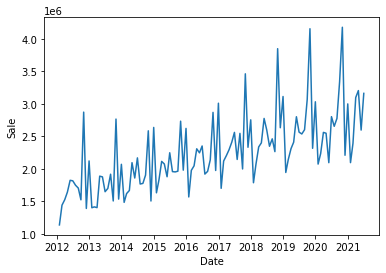

In [38]:
sns.lineplot(data = polk, x = 'Date', y = 'Sale')

In [39]:
store

,StoreID,StoreName,City,ZipCode,CountyNumber,County,Long,Lat
0,2663,Hy-vee Food Store,Urbandale,50322,77.0,Polk,-93.74,41.63
1,2647,Hy-vee 7,Cedar Rapids,52411,57.0,Linn,-91.70,42.03
2,5259,Gameday Liquor,Glenwood,51534,65.0,Mills,-95.92,41.28
3,5597,Liquor Tobacco & Gas,Dubuque,52001,31.0,Dubuque,-90.67,42.51
4,3749,Wal-mart 1526,Storm Lake,50588,11.0,Buena Vist,-95.20,42.66
...,...,...,...,...,...,...,...,...
2449,6055,Caseys General Store 1428,Milo,50166,91.0,Warren,-93.44,41.29
2450,6172,Bp To Go,Hiawatha,52233,57.0,Linn,-91.67,42.05
2451,6179,Bp To Go - 1010,Marion,52302,57.0,Linn,-91.60,42.02
2452,6176,Mini-mart,Cedar Falls,50613,7.0,Black Hawk,-92.46,42.54


In [40]:
store_reg = store[(store['Lat'] < 44) & (store['Long'] < -80)]

<AxesSubplot:xlabel='Long', ylabel='Lat'>

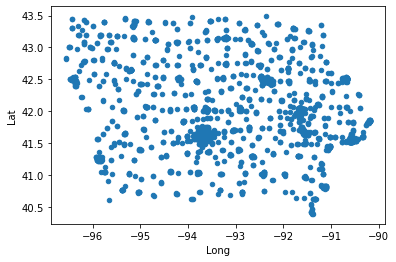

In [41]:
store_reg.plot.scatter(x = 'Long', y = 'Lat')

<AxesSubplot:xlabel='Long', ylabel='Lat'>

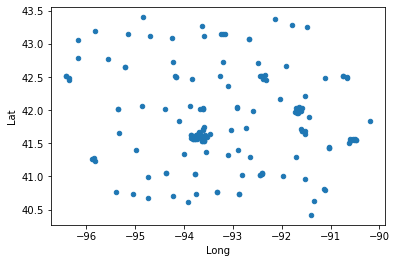

In [42]:
store_HyVee.plot.scatter(x = 'Long', y = 'Lat')

In [55]:
import geopandas

In [65]:
counties = geopandas.read_file('Data/geopandas/cb_2018_us_county_500k.shp')

In [66]:
counties

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,21,007,00516850,0500000US21007,21007,Ballard,06,639387454,69473325,"POLYGON ((-89.18137 37.04630, -89.17938 37.053..."
1,21,017,00516855,0500000US21017,21017,Bourbon,06,750439351,4829777,"POLYGON ((-84.44266 38.28324, -84.44114 38.283..."
2,21,031,00516862,0500000US21031,21031,Butler,06,1103571974,13943044,"POLYGON ((-86.94486 37.07341, -86.94346 37.074..."
3,21,065,00516879,0500000US21065,21065,Estill,06,655509930,6516335,"POLYGON ((-84.12662 37.64540, -84.12483 37.646..."
4,21,069,00516881,0500000US21069,21069,Fleming,06,902727151,7182793,"POLYGON ((-83.98428 38.44549, -83.98246 38.450..."
...,...,...,...,...,...,...,...,...,...,...
3228,31,073,00835858,0500000US31073,31073,Gosper,06,1186616237,11831826,"POLYGON ((-100.09510 40.43866, -100.08937 40.4..."
3229,39,075,01074050,0500000US39075,39075,Holmes,06,1094405866,3695230,"POLYGON ((-82.22066 40.66758, -82.19327 40.667..."
3230,48,171,01383871,0500000US48171,48171,Gillespie,06,2740719114,9012764,"POLYGON ((-99.30400 30.49983, -99.28234 30.499..."
3231,55,079,01581100,0500000US55079,55079,Milwaukee,06,625440563,2455383635,"POLYGON ((-88.06959 42.86726, -88.06959 42.872..."


In [67]:
counties = counties.loc[counties.STATEFP == '19']

In [68]:
counties = counties[['GEOID', 'geometry']]

In [69]:
counties.columns = ['cty_fips', 'geometry']

In [70]:
counties['cty_fips'] = counties['cty_fips'].astype('int32')

### HyVee's Vendor Analysis

In [43]:
con = sqlite3.connect('IowaLiquor.db')
cur = con.cursor()
query = '''
SELECT
    Store.StoreName,
    Date,
    VendorID,
    Store.County,
    Volume,
    Sale
FROM Transactions
LEFT JOIN Store ON Transactions.StoreID = Store.StoreID
WHERE Store.StoreName LIKE '%Hy-vee%';
'''
vendor_HyVee = pd.read_sql_query(query, con)
cur.close()
con.close()

In [44]:
vendor = pd.read_csv('Data/vendor_final.csv')

In [45]:
vendor

,VendorID,VendorName
0,330.0,Gemini Spirits
1,421.0,SAZERAC COMPANY INC
2,370.0,PERNOD RICARD USA
4,260.0,DIAGEO AMERICAS
7,410.0,Patron Spirits Company
8,65.0,Jim Beam Brands
10,115.0,CONSTELLATION BRANDS INC
11,434.0,LUXCO INC
12,259.0,Heaven Hill Brands
14,626.0,JDSO INC / Red Boot Distillery


In [46]:
vendor_merge = vendor_HyVee.merge(vendor[['VendorID', 'VendorName']], on = 'VendorID', how = 'left')

In [47]:
vendor_HyVee = vendor_merge.copy()

In [48]:
vendor_HyVee

,StoreName,Date,VendorID,County,Volume,Sale,VendorName
0,Hy-vee Food Store,2019-07-09 00:00:00,260.0,Polk,2.77,90.00,DIAGEO AMERICAS
1,Hy-vee 2,2020-11-02 00:00:00,626.0,Story,2.77,53.76,JDSO INC / Red Boot Distillery
2,Hy-vee 7,2020-02-03 00:00:00,434.0,Linn,3.17,141.00,LUXCO INC
3,Hy-vee Food Store 1636,2020-07-01 00:00:00,305.0,Clay,0.01,13.31,Mhw LTD
4,Hy-vee 2,2019-07-09 00:00:00,260.0,Polk,0.07,11.03,DIAGEO AMERICAS
...,...,...,...,...,...,...,...
6283490,Hy-vee Food Store,2021-06-30 00:00:00,260.0,Mahaska,2.77,116.64,DIAGEO AMERICAS
6283491,Hy-vee Wine & Spirits,2021-06-30 00:00:00,259.0,Kossuth,2.37,144.00,Heaven Hill Brands
6283492,Hy-vee Food Store,2021-06-30 00:00:00,65.0,Lee,1.18,180.00,Jim Beam Brands
6283493,Hy-vee 7,2021-06-30 00:00:00,35.0,Linn,2.37,148.68,BACARDI USA INC


<AxesSubplot:xlabel='VendorName'>

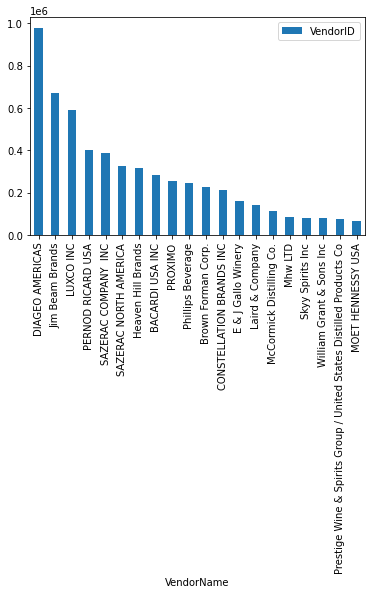

In [49]:
vendor_HyVee.groupby('VendorName').agg({'VendorID':'count'}).sort_values(by = 'VendorID', ascending = False).head(20).plot.bar()

In [50]:
vendor_HyVee['VendorName'].nunique()

302

In [51]:
vendor_HyVee['Date'] = pd.to_datetime(vendor_HyVee['Date'])

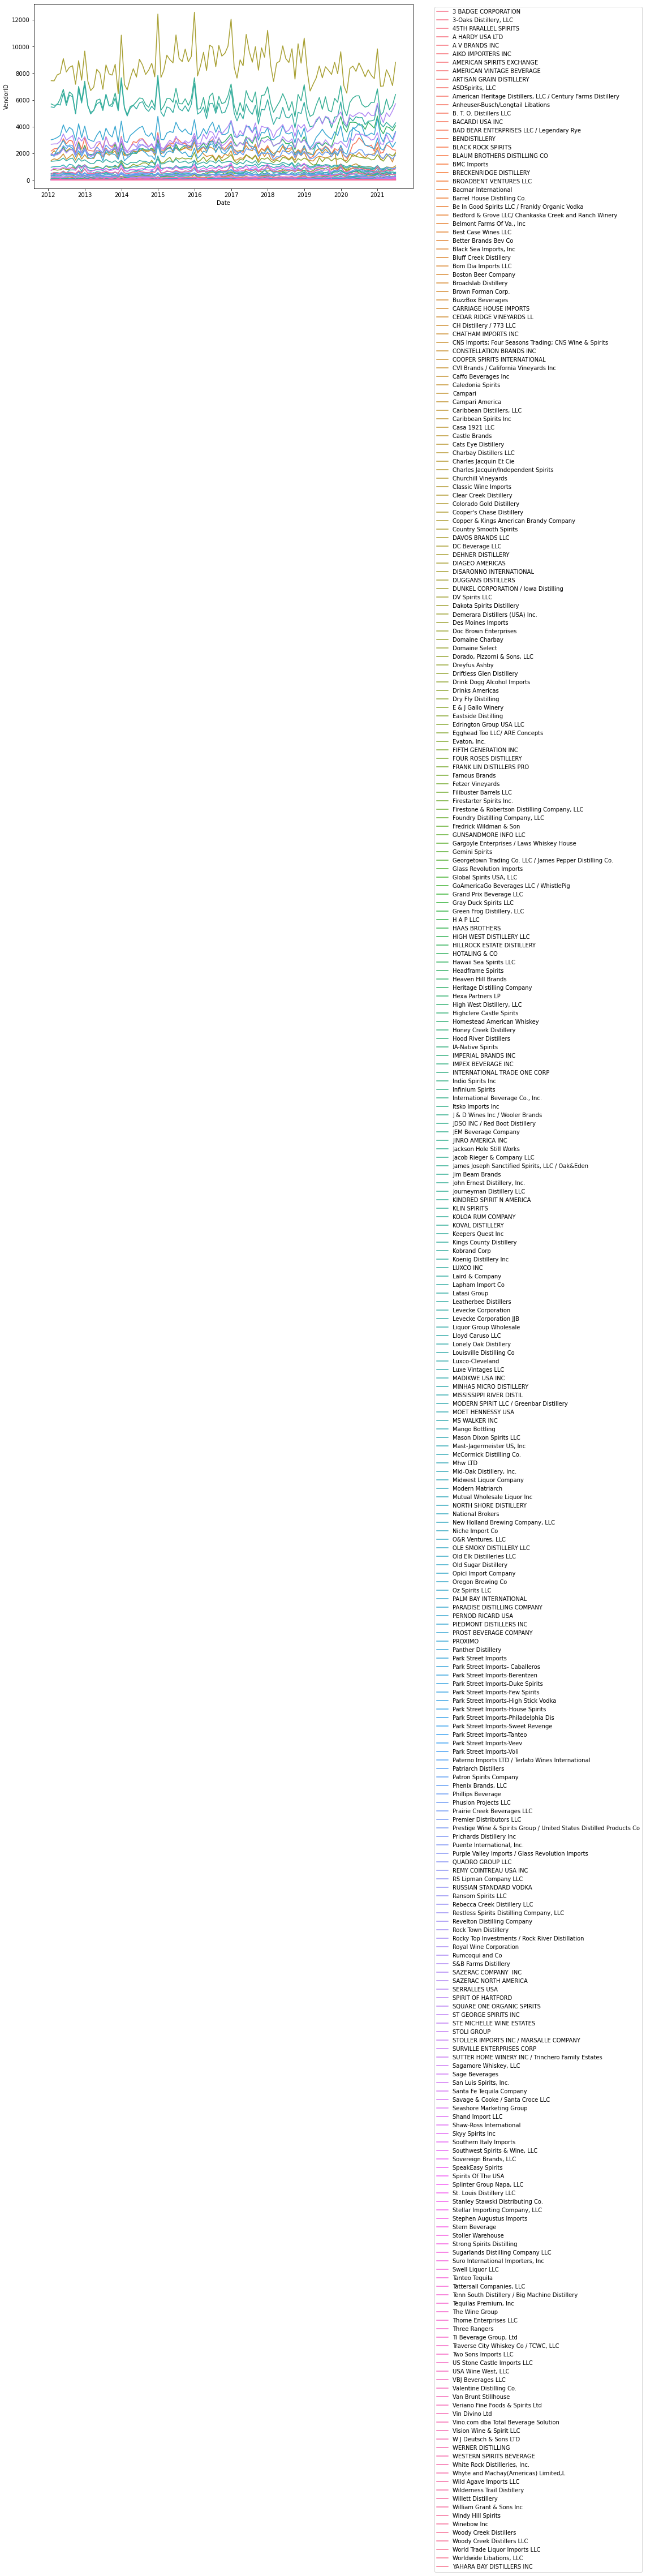

In [52]:
graph3 = vendor_HyVee.groupby(['VendorName',pd.Grouper(key = 'Date',freq = 'M')]).agg({'VendorID':'count'}).reset_index()
plt.figure(figsize = (12,6))
sns.lineplot(data = graph3, x = 'Date', y = 'VendorID', hue = 'VendorName')
plt.legend(bbox_to_anchor = (1.05, 1))

Nothing really stands out. So we can just focus on the bar graph above.

In [53]:
graph3

,VendorName,Date,VendorID
0,3 BADGE CORPORATION,2013-12-31,1
1,3 BADGE CORPORATION,2014-01-31,12
2,3 BADGE CORPORATION,2014-02-28,9
3,3 BADGE CORPORATION,2014-03-31,4
4,3 BADGE CORPORATION,2014-04-30,4
...,...,...,...
10360,"Worldwide Libations, LLC",2021-03-31,17
10361,"Worldwide Libations, LLC",2021-04-30,21
10362,"Worldwide Libations, LLC",2021-05-31,14
10363,"Worldwide Libations, LLC",2021-06-30,21
